In [3]:
########## Neural Network Assignments##############
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
#to select no of layers,nodes,learning rate for best model we use keras tuners (generates hyper parameters)
from kerastuner.tuners import RandomSearch

2021-10-05 12:25:46.867 INFO    numexpr.utils: NumExpr defaulting to 4 threads.
2021-10-05 12:25:53.828 
  command:

    streamlit run C:\Users\SOUMYA\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
<ipython-input-3-49a38937e16b>:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [4]:
forest=pd.read_csv('forestfires.csv')
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
forest.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [7]:
forest.pop('month')

0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: object

In [8]:
forest.pop('day')

0      fri
1      tue
2      sat
3      fri
4      sun
      ... 
512    sun
513    sun
514    sun
515    sat
516    tue
Name: day, Length: 517, dtype: object

In [9]:
forest

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [10]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
forest['size_category']=label_encoder.fit_transform(forest['size_category'])


In [11]:
x=forest.iloc[:,0:28]
y=forest.iloc[:,28]

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [17]:

def build_model(hp):
  model=keras.Sequential()
  for i in range(hp.Int('num_layers',2,20)):
    model.add(layers.Dense(units=hp.Int('units_'+str(i),min_value=32,max_value=512,step=32),activation='relu'))
    model.add(layers.Dense(1,activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),loss='mean_absolute_error',metrics=['mean_absolute_error'])
  return model

In [18]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,executions_per_trial=3)

In [19]:
tuner.search_space_summary()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}


In [20]:
tuner.search(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

tuner.results_summary()


Trial 5 Complete [00h 00m 34s]
val_mean_absolute_error: 0.2705245117346446

Best val_mean_absolute_error So Far: 0.2595918228228887
Total elapsed time: 00h 03m 47s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 11
units_0: 448
learning_rate: 0.001
units_1: 128
units_2: 448
units_3: 160
units_4: 416
units_5: 416
units_6: 416
units_7: 288
units_8: 128
units_9: 32
units_10: 32
Score: 0.2595918228228887
Trial summary
Hyperparameters:
num_layers: 7
units_0: 96
learning_rate: 0.01
units_1: 96
units_2: 384
units_3: 160
units_4: 480
units_5: 32
units_6: 96
units_7: 160
units_8: 512
units_9: 320
units_10: 320
Score: 0.2705245117346446
Trial summary
Hyperparameters:
num_layers: 9
units_0: 480
learning_rate: 0.001
units_1: 128
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.2893217206001282
Tr

In [3]:
iris=pd.read_csv('iris.csv')
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
iris['Species']=label_encoder.fit_transform(iris['Species'])


In [6]:
x=iris.iloc[:,0:4]
y=iris.iloc[:,4]

In [7]:
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [10]:
x

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [11]:
def build_model(hp):
  model=keras.Sequential()
  for i in range(hp.Int('num_layers',2,20)):
    model.add(layers.Dense(units=hp.Int('units_'+str(i),min_value=32,max_value=512,step=32),activation='relu'))
    model.add(layers.Dense(1,activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),loss='mean_absolute_error',metrics=['mean_absolute_error'])
  return model

In [12]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,executions_per_trial=3)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [15]:
tuner.search_space_summary()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Search space summary
Default search space size: 13
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [42]:
import pandas as pd
import numpy
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.layers import Dropout

In [23]:
tuner.search(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

tuner.results_summary()

INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 11
units_0: 448
learning_rate: 0.001
units_1: 128
units_2: 448
units_3: 160
units_4: 416
units_5: 416
units_6: 416
units_7: 288
units_8: 128
units_9: 32
units_10: 32
Score: 0.2595918228228887
Trial summary
Hyperparameters:
num_layers: 7
units_0: 96
learning_rate: 0.01
units_1: 96
units_2: 384
units_3: 160
units_4: 480
units_5: 32
units_6: 96
units_7: 160
units_8: 512
units_9: 320
units_10: 320
Score: 0.2705245117346446
Trial summary
Hyperparameters:
num_layers: 9
units_0: 480
learning_rate: 0.001
units_1: 128
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.2893217206001282
Trial summary
Hyperparameters:
num_layers: 6
units_0: 416
learning_rate: 0.01
units_1: 32
units_2: 480
units_3: 288
units_4: 64
units_5: 384
units_6: 512
units_7: 480

In [43]:
# Importing the dataset
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [44]:
#EDA
df1=df.drop(["monthfeb","monthjan","monthmar","monthapr","monthmay","monthjun","monthjul","monthaug","monthsep","monthoct","monthnov","monthdec"],axis=1)
df2=df1.drop(["daysat","daysun","daythu","daytue","daywed","daymon","dayfri"],axis=1)

In [45]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df2.iloc[:,0] = labelencoder.fit_transform(df2.iloc[:,0])
df2.iloc[:,1] = labelencoder.fit_transform(df2.iloc[:,1])
df2.iloc[:,-1]= labelencoder.fit_transform(df2.iloc[:,-1])

In [27]:
df2.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int32  
 1   day            517 non-null    int32  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int32  
dtypes: float64(8), int32(3), int64(1)
memory usage: 42.5 KB


In [47]:
X = df2.drop('size_category',axis=1)
X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [48]:
Y= df2['size_category']

In [49]:
#standardization
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(X)
X_std = stscaler.transform(X)
X_std = pd.DataFrame(X_std)
X_std.columns=X.columns
print(X_std.head())

      month       day      FFMC       DMC        DC       ISI      temp  \
0  0.284222 -1.423121 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640   
1  0.970871  1.176715 -0.008102 -1.179541  0.488891 -0.509688 -0.153278   
2  0.970871 -0.383187 -0.008102 -1.049822  0.560715 -0.509688 -0.739383   
3  0.284222 -1.423121  0.191362 -1.212361 -1.898266 -0.004756 -1.825402   
4  0.284222  0.136781 -0.243833 -0.931043 -1.798600  0.126966 -1.291012   

         RH      wind      rain     area  
0  0.411724  1.498614 -0.073268 -0.20202  
1 -0.692456 -1.741756 -0.073268 -0.20202  
2 -0.692456 -1.518282 -0.073268 -0.20202  
3  3.233519 -0.009834  0.603155 -0.20202  
4  3.356206 -1.238940 -0.073268 -0.20202  


In [50]:

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size = 0.2, random_state = 0)

In [52]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 10,kernel_initializer='he_uniform',activation='sigmoid',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [53]:

# Fitting the ANN to the Training set
from keras.callbacks import History 
history = History()
model_history=classifier.fit(X_train,y_train,validation_split=0.33, batch_size = 10,epochs = 50,callbacks = [history])

Epoch 1/50
28/28 [==============================] - 4s 60ms/step - loss: 0.5407 - accuracy: 0.7635 - val_loss: 0.5771 - val_accuracy: 0.7372
Epoch 2/50
28/28 [==============================] - 0s 17ms/step - loss: 0.5403 - accuracy: 0.7583 - val_loss: 0.5728 - val_accuracy: 0.7372
Epoch 3/50
28/28 [==============================] - 0s 16ms/step - loss: 0.5544 - accuracy: 0.7452 - val_loss: 0.5695 - val_accuracy: 0.7445
Epoch 4/50
28/28 [==============================] - 0s 15ms/step - loss: 0.5582 - accuracy: 0.7437 - val_loss: 0.5668 - val_accuracy: 0.7445
Epoch 5/50
28/28 [==============================] - 0s 17ms/step - loss: 0.5521 - accuracy: 0.7349 - val_loss: 0.5624 - val_accuracy: 0.7445
Epoch 6/50
28/28 [==============================] - 0s 15ms/step - loss: 0.5478 - accuracy: 0.7414 - val_loss: 0.5596 - val_accuracy: 0.7445
Epoch 7/50
28/28 [==============================] - 0s 16ms/step - loss: 0.5374 - accuracy: 0.7596 - val_loss: 0.5564 - val_accuracy: 0.7445
Epoch 8/50
28

In [54]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

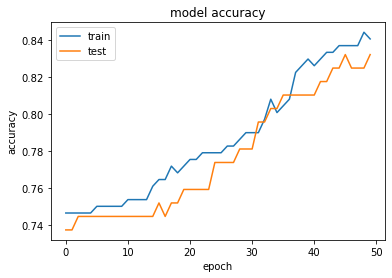

In [55]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

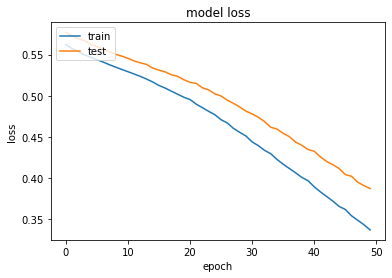

In [56]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [58]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[17, 13],
       [ 0, 74]], dtype=int64)

In [59]:

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.875

In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

import tensorflow as tf

In [62]:
turbine_data= pd.read_csv('gas_turbines.csv')

In [63]:
df= turbine_data.copy()

In [64]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [65]:
df.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [66]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [67]:
x= df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']]
print(x)
y= df['TEY']
print(y)

           AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.7

In [68]:
x_standerdized= (x-x.mean())/x.std()

In [69]:
x_standerdized

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439730,-0.826616,1.281394,-0.921201,-1.379055,-1.488326,0.585221,-1.357286,0.531994,1.387799
1,-1.449553,-0.748623,1.304521,-0.921464,-1.363482,-1.482276,0.585221,-1.363631,0.568715,1.392956
2,-1.434674,-0.686227,1.219045,-0.944353,-1.351264,-1.476226,0.568696,-1.360911,0.552919,1.363540
3,-1.413655,-0.623832,1.169021,-0.946853,-1.348149,-1.464125,0.583950,-1.356379,0.548914,1.382832
4,-1.368648,-0.545839,1.161844,-0.924358,-1.354618,-1.458074,0.582678,-1.350940,0.574160,1.348546
...,...,...,...,...,...,...,...,...,...,...
15034,-1.153144,-1.185388,1.401813,-0.865821,-1.498607,-2.063115,0.103449,-1.543109,1.145754,1.085714
15035,-1.303943,-1.138592,1.447705,-0.913440,-1.438712,-2.268829,-0.276629,-1.513196,1.293535,1.119905
15036,-1.386220,-1.076197,1.476921,-0.951457,-1.410920,-2.789165,-1.026616,-1.467873,2.695835,2.169990
15037,-1.420375,-0.998203,1.441542,-0.988815,-1.447576,-2.456392,-0.528319,-1.422551,1.924619,2.391085


In [70]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

In [99]:
# create a sequential model
def create_model():
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= 'normal', activation='sigmoid'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='sigmoid'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='sigmoid'))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam()
  model.compile(loss='mean_squared_error', optimizer=AdaDelta)
  return model

In [100]:
from keras.callbacks import History 
history = History()
model_history=classifier.fit(X_train,y_train,validation_split=0.33, batch_size = 10,epochs = 50,callbacks = [history])

Epoch 1/50
28/28 [==============================] - 1s 26ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.1146 - val_accuracy: 0.9489
Epoch 2/50
28/28 [==============================] - 0s 16ms/step - loss: 0.0186 - accuracy: 1.0000 - val_loss: 0.1152 - val_accuracy: 0.9489
Epoch 3/50
28/28 [==============================] - 0s 15ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.1138 - val_accuracy: 0.9416
Epoch 4/50
28/28 [==============================] - 0s 16ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.1146 - val_accuracy: 0.9416
Epoch 5/50
28/28 [==============================] - 1s 19ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.1155 - val_accuracy: 0.9489
Epoch 6/50
28/28 [==============================] - 0s 16ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.1160 - val_accuracy: 0.9489
Epoch 7/50
28/28 [==============================] - 0s 16ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.1141 - val_accuracy: 0.9416
Epoch 8/50
28

In [101]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

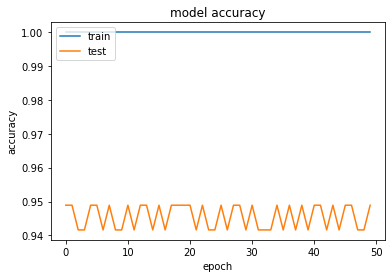

In [102]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

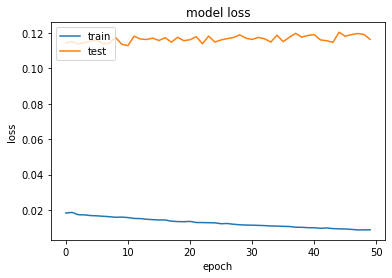

In [103]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [104]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [105]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[26,  4],
       [ 2, 72]], dtype=int64)

In [106]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9423076923076923